# Matplotlib 3D Animation
*Arthur Ryman, last updated 2025-01-30*

## Introduction

This notebook experiments with the 3D graphics capabilites of [matplotlib](https://matplotlib.org).
This package may provide a quick way to prototype animation scenes which would then be fully rendered using Houdini.

Here is some relevant documentation:
* [Generate 3D polygons](https://matplotlib.org/stable/gallery/mplot3d/polys3d.html)
* [mpl_toolkits.mplot3d.art3d.Poly3DCollection](https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.art3d.Poly3DCollection.html)
* [Animations using Matplotlib](https://matplotlib.org/stable/users/explain/animations/animations.html)

## Installation

Use `pip` to install `matplotlib` into your Python environment as follows:

```
python -m pip install -U pip
python -m pip install -U matplotlib
```

## Example: Generate 3D polygons

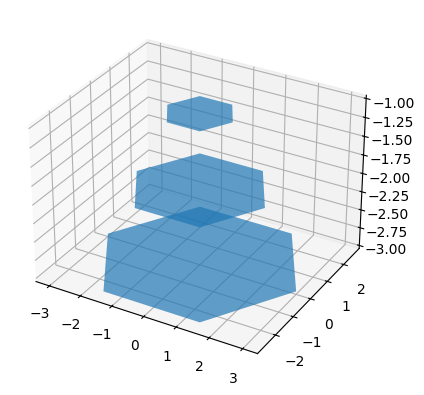

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Coordinates of a hexagon
angles = np.linspace(0, 2 * np.pi, 6, endpoint=False)
x = np.cos(angles)
y = np.sin(angles)
zs = [-3, -2, -1]

# Close the hexagon by repeating the first vertex
x = np.append(x, x[0])
y = np.append(y, y[0])

verts = []
for z in zs:
    verts.append(list(zip(x*z, y*z, np.full_like(x, z))))
verts = np.array(verts)

ax = plt.figure().add_subplot(projection='3d')

poly = Poly3DCollection(verts, alpha=.7)
ax.add_collection3d(poly)
ax.set_aspect('equalxy')

plt.show()

## Generate a cube

We can generate a cube by drawing its six faces.
Each face is a planar surface so we can use `Poly3DCollection` to fill them.

Start by defining the vertices of the cube.
Let's use a cube that is centred on the origin and whose sides have length 2.
The coordinates of the vertices with therefore be +1 or -1.
Centering the cube about the origin makes rotating it easy.

In [4]:
from itertools import product

vertices = list(product([-1, 1], repeat=3))

vertices

[(-1, -1, -1),
 (-1, -1, 1),
 (-1, 1, -1),
 (-1, 1, 1),
 (1, -1, -1),
 (1, -1, 1),
 (1, 1, -1),
 (1, 1, 1)]